<a href="https://colab.research.google.com/github/ChanikaKavindi/Identifying-Ayurvedic-Leaves-Classifier-/blob/main/Implementation_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d ahilaprem/mepco-tropic-leaf

Dataset URL: https://www.kaggle.com/datasets/ahilaprem/mepco-tropic-leaf
License(s): unknown
100% 2.98G/2.99G [01:58<00:00, 26.7MB/s]
100% 2.99G/2.99G [02:01<00:00, 26.4MB/s]


In [7]:
!unzip -q mepco-tropic-leaf.zip

In [23]:
import os
import zipfile
import shutil

dataset_path = 'Clean_Ayurvedic_Dataset'
os.makedirs(dataset_path, exist_ok=True)

base_search_dir = '.'

for root, dirs, files in os.walk(base_search_dir):
    if 'spinach' in root and root.endswith('database'):
        source_spinach_dir = root
        for folder_name in os.listdir(source_spinach_dir):
            src_path = os.path.join(source_spinach_dir, folder_name)
            dest_path = os.path.join(dataset_path, folder_name)
            if os.path.isdir(src_path):
                shutil.copytree(src_path, dest_path, dirs_exist_ok=True)

    if 'MepcoTropicLeaf' in root and root.endswith('database') and 'spinach' not in root:
        source_mepco_dir = root
        for item in os.listdir(source_mepco_dir):
            if item.endswith('.zip'):
                class_name = item[:-4]
                zip_path = os.path.join(source_mepco_dir, item)
                extract_path = os.path.join(dataset_path, class_name)
                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    zip_ref.extractall(extract_path)

In [24]:
class_counts = {}

if os.path.exists(dataset_path):
    for class_name in os.listdir(dataset_path):
        class_dir = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_dir):
            count = len(os.listdir(class_dir))
            if count > 0:
                class_counts[class_name] = count

for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

In [25]:
import matplotlib.pyplot as plt

if class_counts:
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(18, 6))
    bars = plt.bar(classes, counts, color='steelblue', edgecolor='white')

    plt.xlabel('Ayurvedic Plant Category', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    plt.title('MepcoTropicLeaf Class Distribution', fontsize=14)
    plt.xticks(range(len(classes)), classes, rotation=90, ha='center', fontsize=9)

    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                 str(count), ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

In [28]:
import os
import zipfile
import shutil

clean_dir = 'Clean_Ayurvedic_Dataset'
os.makedirs(clean_dir, exist_ok=True)

print("Searching your Colab environment for dataset files...")
images_moved = 0
zips_extracted = 0

for root, dirs, files in os.walk('.'):
    if clean_dir in root:
        continue

    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            class_name = os.path.basename(root)
            dest_folder = os.path.join(clean_dir, class_name)
            os.makedirs(dest_folder, exist_ok=True)

            src_path = os.path.join(root, file)
            dest_path = os.path.join(dest_folder, file)

            if not os.path.exists(dest_path):
                shutil.copy(src_path, dest_path)
                images_moved += 1

    for file in files:
        if file.endswith('.zip') and file != 'mepco-tropic-leaf.zip':
            class_name = file.replace('.zip', '')
            dest_folder = os.path.join(clean_dir, class_name)

            if not os.path.exists(dest_folder) or len(os.listdir(dest_folder)) == 0:
                os.makedirs(dest_folder, exist_ok=True)
                zip_path = os.path.join(root, file)
                try:
                    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                        zip_ref.extractall(dest_folder)
                        zips_extracted += 1
                except zipfile.BadZipFile:
                    print(f"Warning: Failed to unzip {file}")

print(f"\n--- Rescue Operation Complete ---")
print(f"Individual images moved: {images_moved}")
print(f"Plant ZIP files extracted: {zips_extracted}")

classes_found = [d for d in os.listdir(clean_dir) if os.path.isdir(os.path.join(clean_dir, d))]
print(f"\nSUCCESS: Total plant classes ready in '{clean_dir}': {len(classes_found)}")

Searching your Colab environment for dataset files...

--- Rescue Operation Complete ---
Individual images moved: 0
Plant ZIP files extracted: 0

SUCCESS: Total plant classes ready in 'Clean_Ayurvedic_Dataset': 75


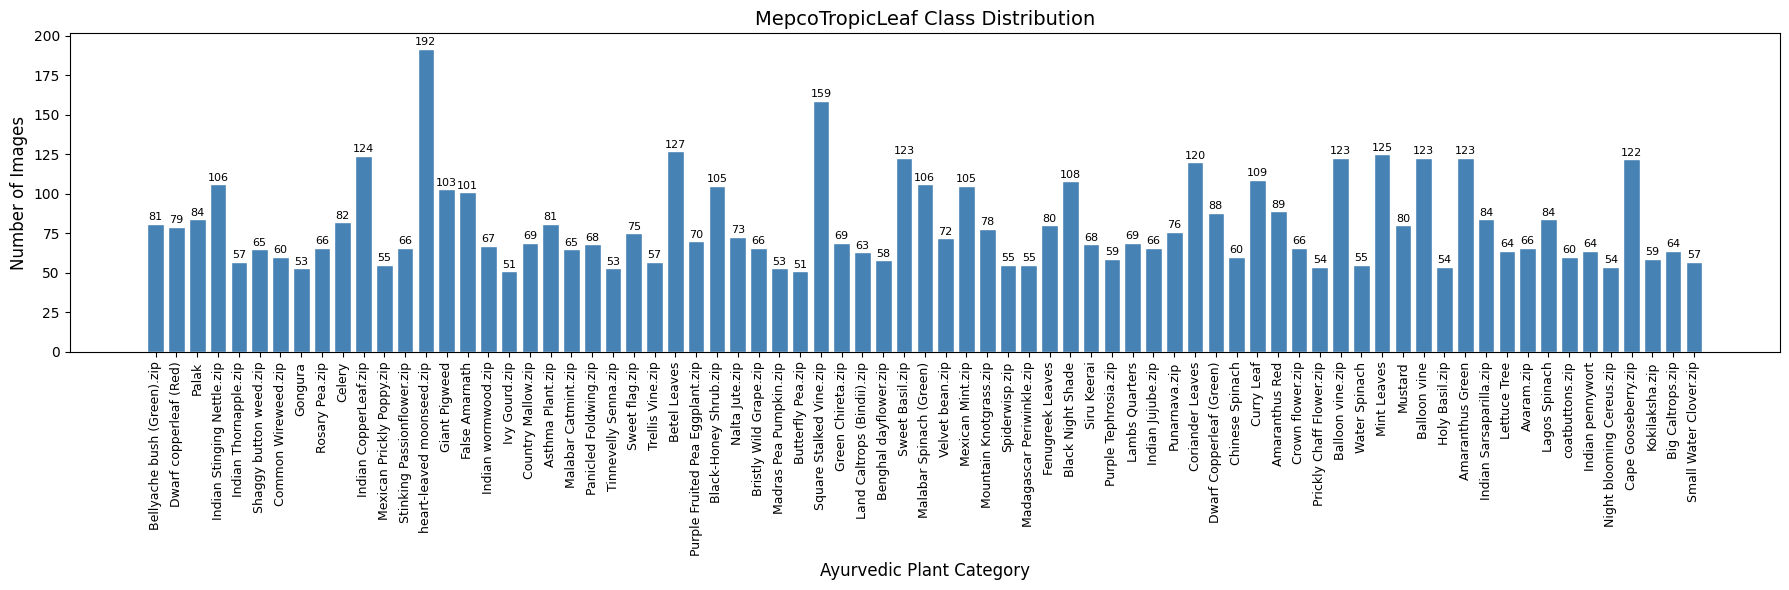

In [35]:
import os
import matplotlib.pyplot as plt

dataset_path = 'Clean_Ayurvedic_Dataset'
class_counts = {}

if os.path.exists(dataset_path):
    for class_name in os.listdir(dataset_path):
        class_dir = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_dir):
            count = len(os.listdir(class_dir))
            if count > 0:
                class_counts[class_name] = count

if class_counts:
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(18, 6))
    bars = plt.bar(classes, counts, color='steelblue', edgecolor='white')

    plt.xlabel('Ayurvedic Plant Category', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    plt.title('MepcoTropicLeaf Class Distribution', fontsize=14)
    plt.xticks(range(len(classes)), classes, rotation=90, ha='center', fontsize=9)

    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                 str(count), ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()
else:
    print("Error: No images found to plot. Ensure extraction was successful.")

Attempting to load dataset and create 'train_ds'...
Found 6021 files belonging to 75 classes.
Using 4817 files for training.

Successfully loaded 75 classes. Drawing images now...



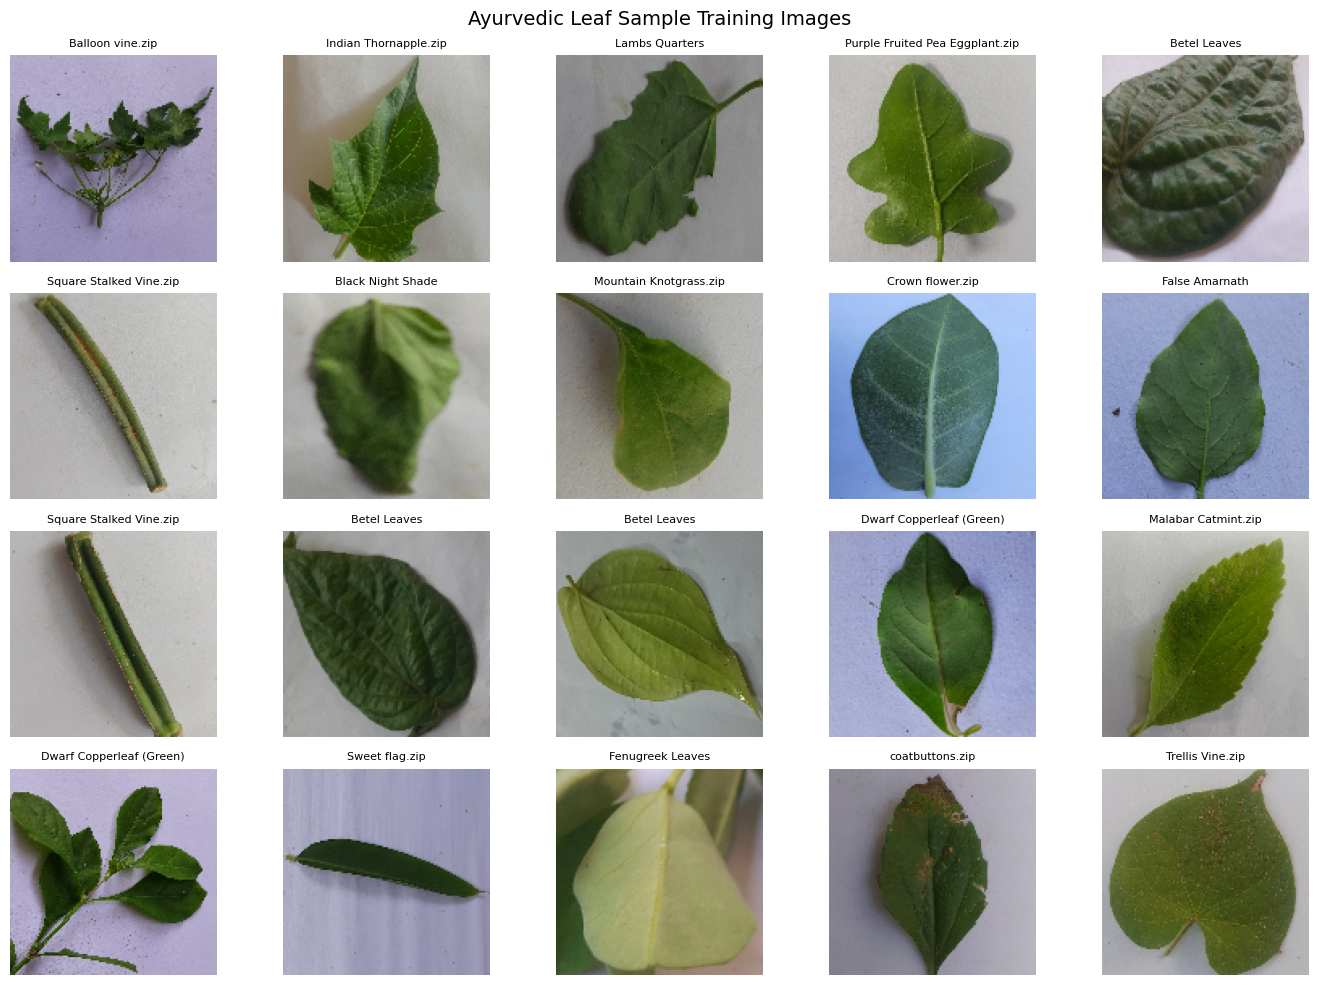

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt

dataset_path = 'Clean_Ayurvedic_Dataset'
batch_size = 32
img_height = 128
img_width = 128

print("Attempting to load dataset and create 'train_ds'...")

try:
    train_ds = tf.keras.utils.image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size
    )

    class_names = train_ds.class_names
    print(f"\nSuccessfully loaded {len(class_names)} classes. Drawing images now...\n")

    plt.figure(figsize=(14, 10))
    for images, labels in train_ds.take(1):
        for i in range(20):
            plt.subplot(4, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]], fontsize=8)
            plt.axis("off")

    plt.suptitle('Ayurvedic Leaf Sample Training Images', fontsize=14)
    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"\nERROR: {e}")
    print("WARNING: The dataset folder is still empty. You need to run the 'Search and Rescue' script from my previous message to extract the images first!")

In [37]:
import tensorflow as tf

dataset_path = 'Clean_Ayurvedic_Dataset'
batch_size = 32
img_height = 128
img_width = 128

print("1. Loading Training Dataset...")
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

print("\n2. Loading Validation Dataset...")
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

print("\n3. Normalizing and Optimizing Datasets...")
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("\nSuccess! Both train_ds and val_ds are completely ready for the model.")

1. Loading Training Dataset...
Found 6021 files belonging to 75 classes.
Using 4817 files for training.

2. Loading Validation Dataset...
Found 6021 files belonging to 75 classes.
Using 1204 files for validation.

3. Normalizing and Optimizing Datasets...

Success! Both train_ds and val_ds are completely ready for the model.


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import shutil
import os

source_dir = 'Clean_Ayurvedic_Dataset'

drive_dir = '/content/drive/MyDrive/Clean_Ayurvedic_Dataset'

print("Checking Google Drive...")

if not os.path.exists(drive_dir):
    print("Copying dataset to Google Drive. This might take a few minutes, please wait...")
    shutil.copytree(source_dir, drive_dir)
    print("\nSuccess! Your dataset is permanently saved in your Google Drive.")
else:
    print("\nDataset already exists in your Google Drive! No need to copy again.")

Checking Google Drive...
Copying dataset to Google Drive. This might take a few minutes, please wait...

Success! Your dataset is permanently saved in your Google Drive.
